In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
HLS_L8 = ["B02", "B03", "B04", "B05", "B06", "B07"] # Coastal Aerosol: "B01", cirrus: "B09"
L8_2_S2 = {"B01": "B01", "B02": "B02", "B03": "B03", "B04": "B04", 
          "B05": "B8A", "B06": "B11", "B07": "B12", "B09": "B10"}
L8_bandname = {"B01":"Coastal Aerosol", "B02":"Blue", "B03":"Green", "B04":"Red", 
               "B05":"NIR Narrow", "B06":"SWIR 1", "B07":"SWIR 2", "B09":"Cirrus"}
S2_bandname = {"B01":"Coastal Aerosol", "B02":"Blue", "B03":"Green", "B04":"Red", 
               "B8A":"NIR Narrow", "B11":"SWIR1", "B12":"SWIR2", "B10":"Cirrus"}
L8_name2index = {'Coastal Aerosol': 'B01', 'Blue': 'B02', 'Green': 'B03', 'Red': 'B04',
                 'NIR': 'B05', 'SWIR1': 'B06', 'SWIR2': 'B07'}
S2_name2index = {'Coastal Aerosol': 'B01', 'Blue': 'B02', 'Green': 'B03', 'Red': 'B04',
                 'NIR': 'B8A', 'SWIR1': 'B11', 'SWIR2': 'B12'}
common_bands = ["Coastal Aerosol", "Blue","Green","Red","NIR","SWIR1", "SWIR2"]
bandname2bpname = {"Coastal Aerosol": "CA", "Blue": "Blue","Green": "Green","Red": "Red","NIR": "NIR1","SWIR1": "SWIR1", "SWIR2": "SWIR2"}
work_dir = r"C:\Users\qzhou2\C_workdir\Bandpass_linear"

In [3]:

# df_MSI2B =  pd.read_csv('https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/DRLL/SaSurf/ConvolutedSpectra/Hyperion/Hyperion_spectra_MSI_2B.csv')
# df_OLI   =  pd.read_csv('https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/DRLL/SaSurf/ConvolutedSpectra/Hyperion/Hyperion_spectra_OLI.csv')
df_MSI2B =  pd.read_csv(os.path.join(work_dir, "Hyperion_spectra_MSI_2B.csv"))
df_OLI   =  pd.read_csv(os.path.join(work_dir, "Hyperion_spectra_OLI.csv"))

CA
LinregressResult(slope=np.float64(0.9958871255508038), intercept=np.float64(-0.0002487276412661901), rvalue=np.float64(0.9999861238470251), pvalue=np.float64(0.0), stderr=np.float64(5.246958254665566e-05), intercept_stderr=np.float64(4.762262832019465e-06))
Blue
LinregressResult(slope=np.float64(0.9780309010429667), intercept=np.float64(-0.004061428468512457), rvalue=np.float64(0.999733596614855), pvalue=np.float64(0.0), stderr=np.float64(0.0002258227357406648), intercept_stderr=np.float64(2.5482365945872784e-05))
Green
LinregressResult(slope=np.float64(1.0073190860136878), intercept=np.float64(-0.0008447341379998752), rvalue=np.float64(0.9998286859944506), pvalue=np.float64(0.0), stderr=np.float64(0.00018649952725904016), intercept_stderr=np.float64(2.677346198052814e-05))
Red
LinregressResult(slope=np.float64(0.9760896456316299), intercept=np.float64(0.0010256725249797871), rvalue=np.float64(0.9998546297658694), pvalue=np.float64(0.0), stderr=np.float64(0.00016646894857005808), in

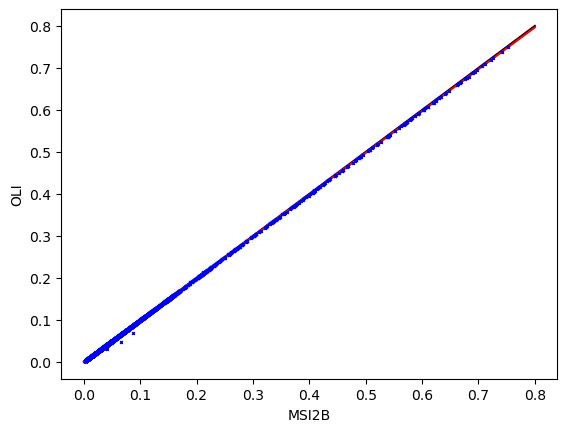

In [4]:
### Code from Martin Claverie for quick evaluation ###
x = np.array([0,.8])

plt.plot(x,x,'k')
lr = linregress(df_MSI2B.CA,df_OLI.CA)
plt.plot(x, lr.intercept + lr.slope*x, 'r', label='fitted line')
plt.plot(df_MSI2B.CA,df_OLI.CA,'xb',markersize=2)
plt.xlabel('MSI2B')
plt.ylabel('OLI')

for band in df_MSI2B.keys()[1:]:
    print(band)
    print(linregress(df_MSI2B[band],df_OLI[band]))

### Reference ###
# CA
# LinregressResult(slope=0.9958871255508047, intercept=-0.0002487276412662387, rvalue=0.9999861238470256, pvalue=0.0, stderr=5.246958254581606e-05)
# Blue
# LinregressResult(slope=0.9780309010429665, intercept=-0.004061428468512443, rvalue=0.9997335966148552, pvalue=0.0, stderr=0.00022582273574057055)
# Green
# LinregressResult(slope=1.007319086013688, intercept=-0.0008447341379998891, rvalue=0.9998286859944513, pvalue=0.0, stderr=0.00018649952725867746)
# Red
# LinregressResult(slope=0.9760896456316293, intercept=0.0010256725249798704, rvalue=0.9998546297658693, pvalue=0.0, stderr=0.00016646894857012156)
# NIR2
# LinregressResult(slope=1.0177316936553256, intercept=0.008355443717503575, rvalue=0.9976538573319376, pvalue=0.0, stderr=0.0006984481559719521)
# NIR1
# LinregressResult(slope=0.9966445715003783, intercept=2.526430153748649e-05, rvalue=0.9999944867158492, pvalue=0.0, stderr=3.309830252349184e-05)
# SWIR1
# LinregressResult(slope=0.9999565220607817, intercept=-0.0002904296585864441, rvalue=0.9999986330351948, pvalue=0.0, stderr=1.6535550606312104e-05)
# SWIR2
# LinregressResult(slope=0.9867743558538057, intercept=0.00035471873443135293, rvalue=0.999942984507639, pvalue=0.0, stderr=0.00010538803269120731)

In [5]:
fwhm_df = pd.read_csv(os.path.join(work_dir, "Hyperion_wavelength_FWHM.csv")).sort_values("Wavelength(nm)")
fwhm_df["Wavelength(nm)"] = fwhm_df["Wavelength(nm)"]#.round()
print(fwhm_df.head())
def find_neighbours(value, df, idx_col, val_col):
    exactmatch = df[df[idx_col] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        temp_df = df[df[idx_col] < value][idx_col]
        if len(temp_df)>0:
            lowerneighbour_ind = temp_df.idxmax()
        else:
            lowerneighbour_ind = 0
        temp_df = df[df[idx_col] > value][idx_col]
        if len(temp_df)>0:
            upperneighbour_ind = temp_df.idxmin()
        else:
            upperneighbour_ind = len(df) - 1
        return [lowerneighbour_ind, upperneighbour_ind] 

def find_hyperion_bands(s2_band, buffer, hyperion_df, return_index=False):
    low_bnd = find_neighbours(s2_band-buffer, hyperion_df, "Wavelength(nm)", "FWHM(nm)")[0]
    up_bnd = find_neighbours(s2_band+buffer, hyperion_df, "Wavelength(nm)", "FWHM(nm)")[-1]
    # print("Lower boundary: ", hyperion_df.iloc[low_bnd])
    # print("Upper boundary: ", hyperion_df.iloc[up_bnd])
    # print("Arry: ", hyperion_df.iloc[(low_bnd-1):up_bnd])
    if return_index:
        return hyperion_df.iloc[low_bnd:(up_bnd+1)], [low_bnd, up_bnd]
    else:
        return hyperion_df.iloc[low_bnd:(up_bnd+1)]
    

# print(find_neighbours(426.82, fwhm_df, "Wavelength(nm)", "FWHM(nm)"))
# print(find_neighbours(436.9, fwhm_df, "Wavelength(nm)", "FWHM(nm)"))
# print(find_neighbours(2395.5, fwhm_df, "Wavelength(nm)", "FWHM(nm)"))
# idx = find_neighbours(426.82, fwhm_df, "Wavelength(nm)", "FWHM(nm)")
# print(find_hyperion_bands(414, 20, fwhm_df))
# print(find_hyperion_bands(2312, 20, fwhm_df))
# print(find_hyperion_bands(2385, 20, fwhm_df))


   Wavelength(nm)  FWHM(nm)
0          426.82   11.3871
1          436.99   11.3871
2          447.17   11.3871
3          457.34   11.3871
4          467.52   11.3871


In [6]:
### test: distribution of Hyperion RSR function (Gaussian) ###
# fwhm = 11.3871
# delta = fwhm/(2*np.sqrt(2*np.log(2)))
# # wv = 436.99
# rsr = []
# for i in range(-20, 21):
#     rsr.append(np.exp(-(i)**2/(2*delta**2))/(delta*np.sqrt(2*np.pi)))
# print(rsr)
# plt.plot(rsr)

def Gaussian_rsr(hyperion_band, fwhm, buffer):
    # print(type(fwhm))
    # hyperion_band = np.round(hyperion_band)
    # delta = fwhm/(2*np.sqrt(2*np.log(2)))
    delta = fwhm/(2*np.sqrt(2*np.log10(2)))
    rsr = []
    wv = []
    for i in range(np.round(hyperion_band-buffer).astype(int), np.round(hyperion_band+buffer+1).astype(int)):
        # rsr.append(np.exp(-(i-hyperion_band)**2/(2*delta**2))/(delta*np.sqrt(2*np.pi)))
        rsr.append(np.exp(-(i-hyperion_band)**2/(2*delta**2))/(delta*np.sqrt(2*np.pi)))
        wv.append(i)
    return {"wv": wv, "rsr": rsr}

# rsr = Gaussian_rsr(436.99, 11.3871, 20)
# plt.plot(rsr["wv"], rsr["rsr"])

### Calculate simulated S2 surface reflectance for samples ###
def simu_s2_spec(s2_rsr_df, hyperion_fwhm_df, hyperion_spec_df, sensor, band): #sensor=S2B, band="Red"
# band = "Red"
    rsr_bandname = f"{sensor}_SR_AV_{S2_name2index[band]}".replace("0","")
    band_rsr = s2_rsr_df[rsr_bandname]
    band_rsr = band_rsr[band_rsr>0]
    # print(band_rsr)
    # print(band_rsr.index)
    # print(band_rsr.index.min())
    # print(band_rsr.index.max())
    low_bands, low_idx = find_hyperion_bands(band_rsr.index.min(), buffer, fwhm_df, return_index=True)
    up_bands, up_idx = find_hyperion_bands(band_rsr.index.max(), buffer, fwhm_df, return_index=True)
    # print("low_idx: ", low_idx[0])
    # print("low_bands: ", low_bands)
    # print("up_idx: ", up_idx[-1])
    # print("up_bands: ", up_bands)
    hyperion_overlap = fwhm_df.iloc[low_idx[0]:(up_idx[-1]+1)]
    # print(hyperion_overlap)
    rsr_weights = []
    for index, row in hyperion_overlap.iterrows():
        # print(row)
        rsr_hy_df = pd.DataFrame(Gaussian_rsr(row["Wavelength(nm)"], row["FWHM(nm)"], buffer))
        rsr_hy_df.set_index(['wv'], inplace=True)
        # print(rsr_hy_df)
        join_df = rsr_hy_df.join(band_rsr, how='inner')
        # print(join_df.head())
        rsr_weight = np.sum(join_df["rsr"]*join_df[rsr_bandname])
        if str(row["Wavelength(nm)"]) in hyperion_spec_df.columns:
            sample_cal["SR"] += hyperion_spec_df[str(row["Wavelength(nm)"])] * rsr_weight
            rsr_weights.append(rsr_weight)
    sample_cal["SR"] /= np.sum(rsr_weights) 
    sample_cal["SR"] /= 10000.0
    
    # print(sample_cal.head())
    sample_cal.to_csv(os.path.join(work_dir, f"Hyperion_spectra_MSI_{sensor}_{band}_test.csv"))
    return sample_cal

# Validate functions

In [7]:
# s2_rsr = pd.read_csv(os.path.join(work_dir, "S2_SRF_2024", "SpectralResponses_S2C.csv"), index_col="SR_WL")
# s2_rsr_df = pd.read_csv(os.path.join(work_dir, "S2_SRF_2024", "SpectralResponses_S2B.csv"), index_col="SR_WL")
s2_rsr_df = pd.read_csv(os.path.join(work_dir, "S2_SRF_old", "SpectralResponses_S2B.csv"), index_col="SR_WL")
hyperion_fwhm_df = pd.read_csv(os.path.join(work_dir, "Hyperion_wavelength_FWHM.csv")).sort_values("Wavelength(nm)")
hyperion_spec_df = pd.read_csv(os.path.join(work_dir, "Hyperion_spectra.csv"))
# print(sample_spec.head())
sample_cal = pd.DataFrame({"SR":[0]*len(hyperion_spec_df)})
# print(sample_cal.head())
buffer = 15

sensor = "S2B"
df_ref =  pd.read_csv(os.path.join(work_dir, "Hyperion_spectra_MSI_2B.csv"))
print(sensor)
for band in common_bands:
    sample_cal = simu_s2_spec(s2_rsr_df, hyperion_fwhm_df, hyperion_spec_df, sensor, band)
    # print(np.max(np.abs(df_MSI2B["Red"] - sample_cal["SR"])))
    print("\n", band)
    ref_reg = linregress(df_ref[bandname2bpname[band]],df_OLI[bandname2bpname[band]])
    print("Reference: ", np.round(ref_reg.slope, 3), np.round(ref_reg.intercept, 5))
    cal_reg = linregress(sample_cal["SR"],df_OLI[bandname2bpname[band]])
    print("Calculation: ", np.round(cal_reg.slope, 3), np.round(cal_reg.intercept, 5))

S2B

 Coastal Aerosol
Reference:  0.996 -0.00025
Calculation:  0.996 -0.00022

 Blue
Reference:  0.978 -0.00406
Calculation:  0.977 -0.00419

 Green
Reference:  1.007 -0.00084
Calculation:  1.007 -0.00085

 Red
Reference:  0.976 0.00103
Calculation:  0.976 0.00102

 NIR
Reference:  0.997 3e-05
Calculation:  0.997 3e-05

 SWIR1
Reference:  1.0 -0.00029
Calculation:  1.0 -0.00024

 SWIR2
Reference:  0.987 0.00035
Calculation:  0.987 0.00028


# S2C coefficients

In [12]:
s2_rsr_df = pd.read_csv(os.path.join(work_dir, "S2_SRF_2024", "SpectralResponses_S2C.csv"), index_col="SR_WL")
# print(s2_rsr.head())
hyperion_fwhm_df = pd.read_csv(os.path.join(work_dir, "Hyperion_wavelength_FWHM.csv")).sort_values("Wavelength(nm)")
hyperion_spec_df = pd.read_csv(os.path.join(work_dir, "Hyperion_spectra.csv"))
# print(sample_spec.head())
sample_cal = pd.DataFrame({"SR":[0]*len(hyperion_spec_df)})
# print(sample_cal.head())
buffer = 15

sensor = "S2C"
print(sensor)
for band in common_bands:
    sample_cal = simu_s2_spec(s2_rsr_df, hyperion_fwhm_df, hyperion_spec_df, sensor, band)
    # print(np.max(np.abs(df_MSI2B["Red"] - sample_cal["SR"])))
    print("\n", band)
    cal_reg = linregress(sample_cal["SR"],df_OLI[bandname2bpname[band]])
    print("Calculation: ", np.round(cal_reg.slope, 4), np.round(cal_reg.intercept, 4))
    # print("Calculation: ", np.round(cal_reg.slope, 3), np.round(cal_reg.intercept, 5))

S2C

 Coastal Aerosol
Calculation:  1.003 -0.0

 Blue
Calculation:  0.9851 -0.0027

 Green
Calculation:  1.0038 -0.0009

 Red
Calculation:  0.9718 0.0011

 NIR
Calculation:  0.9995 -0.0003

 SWIR1
Calculation:  0.9994 -0.0007

 SWIR2
Calculation:  0.991 0.0004
